In [1]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve,mean_squared_error,precision_score,recall_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import itertools
from sklearn import metrics

# Loading data
data = pd.read_csv('data/all_dataset.csv')
print(data.shape)


(10000, 10)


In [2]:
from sklearn import preprocessing


X = data.drop(['activity','activityIndex'], axis=1).values
y = data.activityIndex.values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))
print(X.shape, y.shape)

labels=[1,2,3,4]

X_train and y_train : ((7000, 8),(7000,))
X_test  and y_test  : ((3000, 8),(3000,))
(10000, 8) (10000,)


Labels that are useful in plotting confusion matrix

In [3]:
labels=['RUNNING','STAIR UP','WALKING','SITTING']

In [4]:


plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc
    
  return roc_auc_dict

# assuming your already have a list of actual_class and predicted_class from the logistic regression classifier

In [6]:



def perform_model(model,name,class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    results = dict()
    model.fit(X_train, y_train)

    # predict test data
    print('Predicting test data')

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    results['predicted'] = y_pred
    results['proba'] = y_proba
    

    f_measure = f1_score(y_test, y_pred, average='weighted')
    results['f_measure'] = f_measure
    print('==> F1 Score:- {}\n'.format(f_measure))

    accuracy = accuracy_score(y_test, y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))

    print("------------------- Multi Class ROC Curves and ROC Areas -------------------")
    roc_auc_scores = roc_auc_score_multiclass(y_test, y_pred)
    results['roc_auc_scores'] = roc_auc_scores
    print('==> AUC Score:- {}\n'.format(roc_auc_scores))  
    # compute ROC curves for each class

    fpr = {}
    tpr = {}
    thresholds = {}
    for i in range(4):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_proba[:, i], pos_label=i+1)
    # plot the ROC curves
    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (ROC Area = {1:0.2f})'
                ''.format(i+1, roc_auc_scores[i+1]))
    plt.plot([0, 1], [0, 1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name+' Multi-class ROC curves')
    plt.legend(loc="lower right")
    plt.savefig("roc_curves_images/"+name)


    rms = mean_squared_error(y_test, y_pred, squared=False)
    results['rms'] = rms
    print('==> Root Mean Squared Error:- {}\n'.format(rms))

    rec = recall_score(y_test, y_pred, average='weighted')
    results['rec'] = rec
    print('==> Recall Score:- {}\n'.format(rec))

    prc_scr = precision_score(y_test, y_pred, average='weighted')
    results['prc_scr'] = prc_scr
    print('==> Precision Score:- {}\n'.format(prc_scr))

    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(visible=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)

    # add the trained  model to the results
    results['model'] = model
    
    return results
    





KNN

Predicting test data
==> F1 Score:- 0.8672599626683233

==> Accuracy:- 0.867

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.8417226223223598, 2: 0.9224562598003999, 3: 0.8983903622186141, 4: 0.9835747746624208}

==> Root Mean Squared Error:- 0.5689170999949524

==> Recall Score:- 0.867

==> Precision Score:- 0.8675494874929548



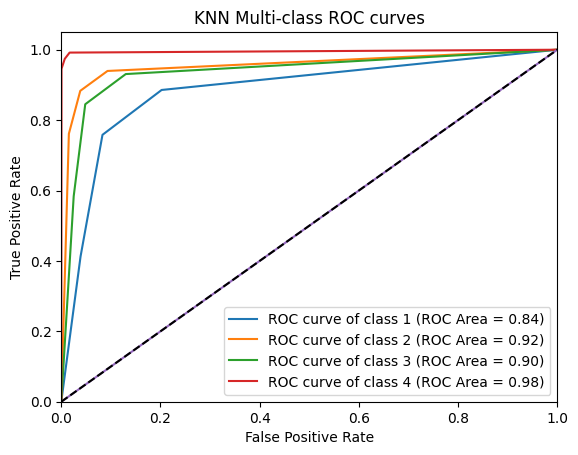

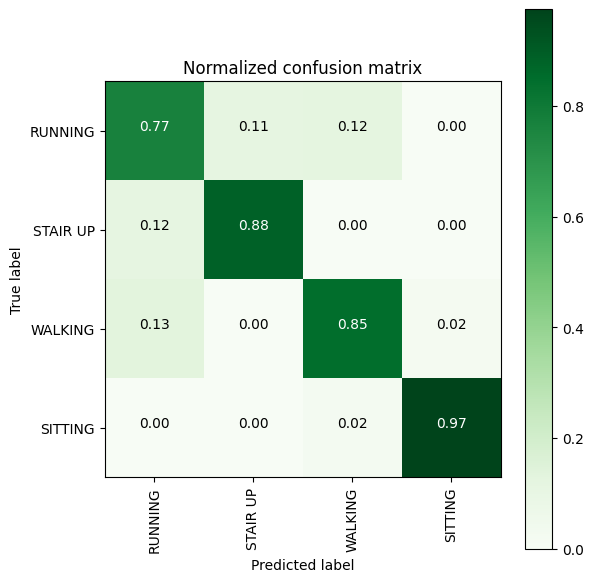

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.76      0.77      0.76       761
           2       0.89      0.88      0.89       779
           3       0.85      0.85      0.85       723
           4       0.98      0.97      0.98       737

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_results = perform_model(knn_classifier, name='KNN', class_labels=labels)
# observe the attributes of the model 
filename = 'models/knn.sav'
pickle.dump(knn_results['model'], open(filename, 'wb'))





NAIVE BAYES

Predicting test data
==> F1 Score:- 0.7537152596899339

==> Accuracy:- 0.7546666666666667

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.7091947256818119, 2: 0.8764732027518858, 3: 0.7976463170401471, 4: 0.9635832407480135}

==> Root Mean Squared Error:- 0.7991662321861871

==> Recall Score:- 0.7546666666666667

==> Precision Score:- 0.7533601960250084



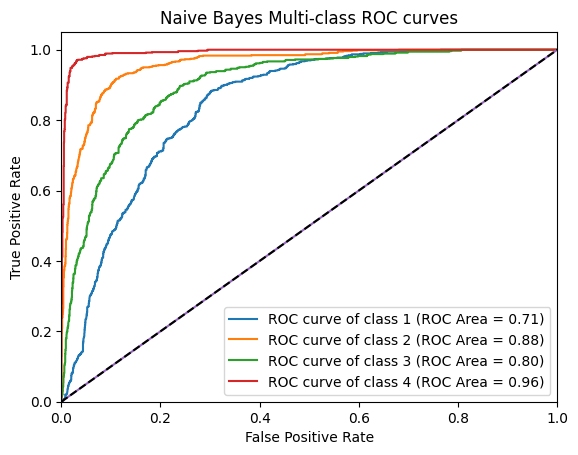

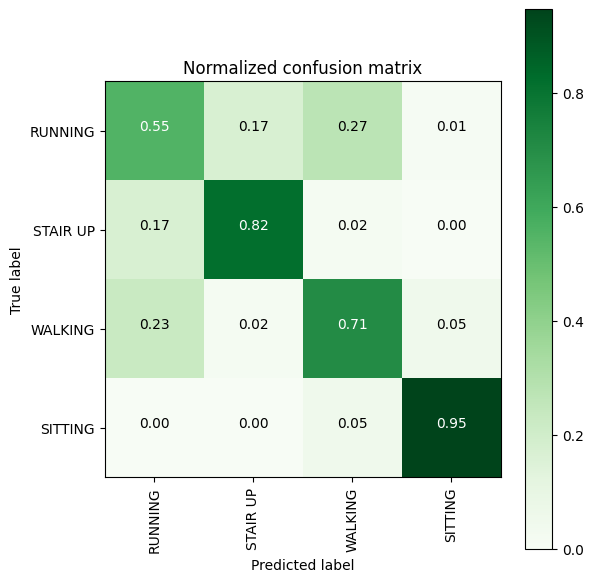

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.59      0.55      0.57       761
           2       0.82      0.82      0.82       779
           3       0.67      0.71      0.69       723
           4       0.94      0.95      0.94       737

    accuracy                           0.75      3000
   macro avg       0.75      0.76      0.75      3000
weighted avg       0.75      0.75      0.75      3000



In [8]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_results = perform_model(nb_classifier, name='Naive Bayes', class_labels=labels)
# observe the attributes of the model 
filename = 'models/nb.sav'
pickle.dump(nb_results['model'], open(filename, 'wb'))

RANDOM FOREST

Predicting test data
==> F1 Score:- 0.848064695566977

==> Accuracy:- 0.8483333333333334

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.809910210760271, 2: 0.9098683993783231, 3: 0.8920223341114556, 4: 0.9853735180602831}

==> Root Mean Squared Error:- 0.6080021929785012

==> Recall Score:- 0.8483333333333334

==> Precision Score:- 0.848000129251466



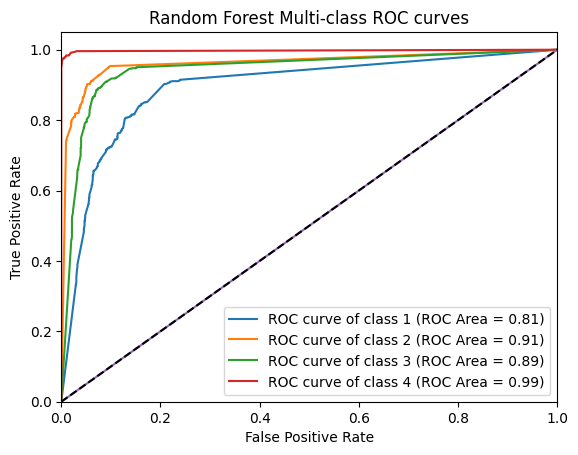

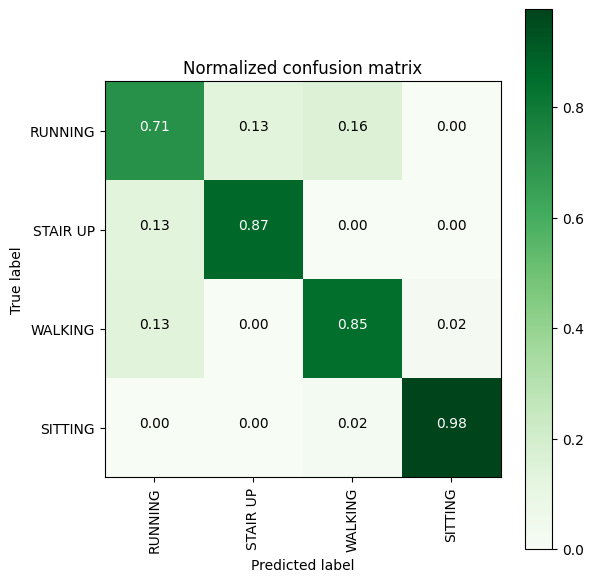

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.73      0.71      0.72       761
           2       0.87      0.87      0.87       779
           3       0.81      0.85      0.83       723
           4       0.98      0.98      0.98       737

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_results = perform_model(rf_classifier,name='Random Forest', class_labels=labels)
# observe the attributes of the model 
filename = 'models/rf.sav'
pickle.dump(rf_results['model'], open(filename, 'wb'))

C4.5

Predicting test data
==> F1 Score:- 0.8884479761079515

==> Accuracy:- 0.888

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.8698549016684871, 2: 0.9328934508331315, 3: 0.9138471126564217, 4: 0.985357928950835}

==> Root Mean Squared Error:- 0.5186520991955976

==> Recall Score:- 0.888

==> Precision Score:- 0.8890238902050656



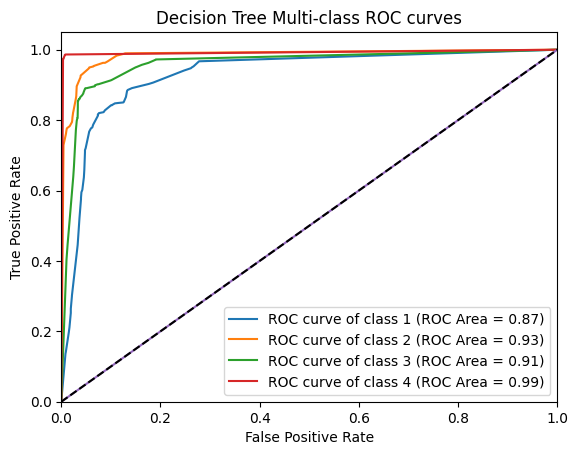

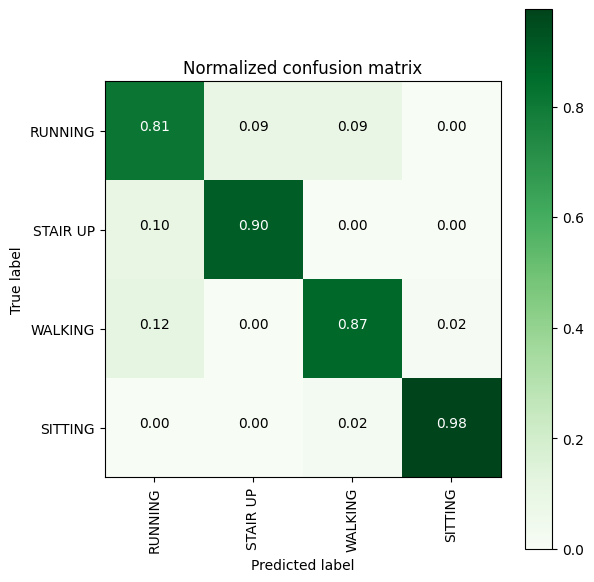

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.79      0.81      0.80       761
           2       0.91      0.90      0.90       779
           3       0.87      0.87      0.87       723
           4       0.98      0.98      0.98       737

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=10, random_state = 0,)
dt_results = perform_model(dt_classifier, name='Decision Tree', class_labels=labels)
# observe the attributes of the model 
filename = 'models/c4.5.sav'
pickle.dump(dt_results['model'], open(filename, 'wb'))

SVM

Predicting test data
==> F1 Score:- 0.800754298425683

==> Accuracy:- 0.8003333333333333

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.7741594326827198, 2: 0.904666565327233, 3: 0.8223257288745291, 4: 0.9662501776259105}

==> Root Mean Squared Error:- 0.7169379331573968

==> Recall Score:- 0.8003333333333333

==> Precision Score:- 0.801200334871999



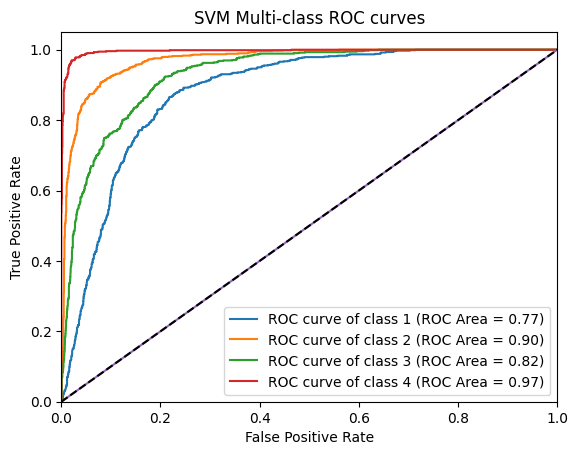

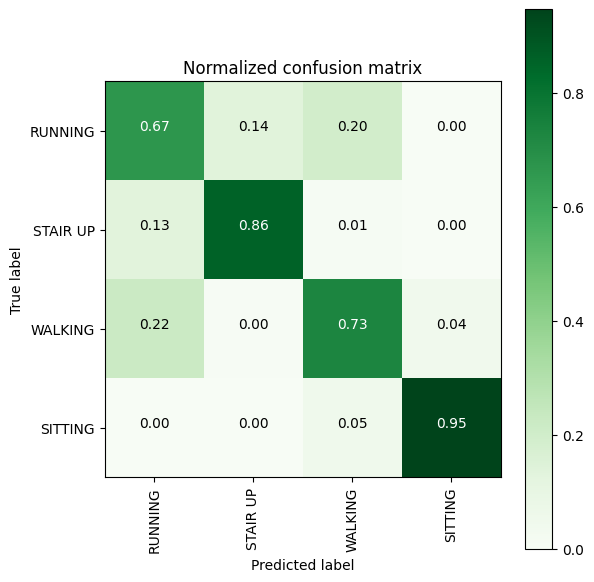

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.66      0.67      0.66       761
           2       0.86      0.86      0.86       779
           3       0.73      0.73      0.73       723
           4       0.95      0.95      0.95       737

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



In [11]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0,probability = True)
svm_results = perform_model(svm_classifier, name='SVM', class_labels=labels)
# observe the attributes of the model 
filename = 'models/svm.sav'
pickle.dump(svm_results['model'], open(filename, 'wb'))

MLP

Iteration 1, loss = 4.18023966
Iteration 2, loss = 0.76913725
Iteration 3, loss = 0.70434212
Iteration 4, loss = 0.68392666
Iteration 5, loss = 0.66364739
Iteration 6, loss = 0.64868309
Iteration 7, loss = 0.63177927
Iteration 8, loss = 0.62625876
Iteration 9, loss = 0.67113404
Iteration 10, loss = 0.61652628
Iteration 11, loss = 0.64347110
Iteration 12, loss = 0.62590975
Iteration 13, loss = 0.62178388
Iteration 14, loss = 0.58828429
Iteration 15, loss = 0.61328551
Iteration 16, loss = 0.57966143
Iteration 17, loss = 0.62918944
Iteration 18, loss = 0.56836531
Iteration 19, loss = 0.60802808
Iteration 20, loss = 0.56837204
Iteration 21, loss = 0.56740924
Iteration 22, loss = 0.56252307
Iteration 23, loss = 0.54615975
Iteration 24, loss = 0.57893277
Iteration 25, loss = 0.53004097
Iteration 26, loss = 0.59676173
Iteration 27, loss = 0.53733315
Iteration 28, loss = 0.52768603
Iteration 29, loss = 0.52227443
Iteration 30, loss = 0.59348458
Iteration 31, loss = 0.51482917
Iteration 32, los

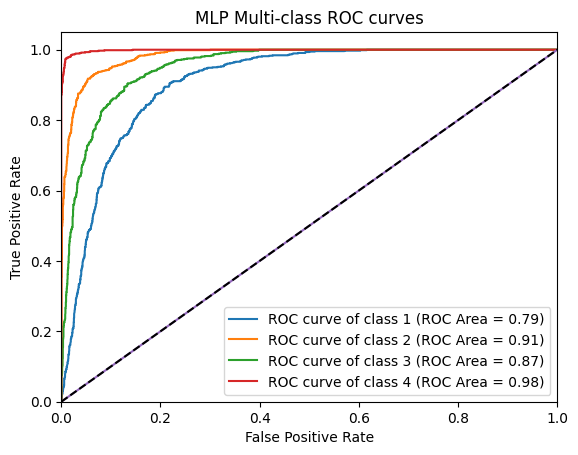

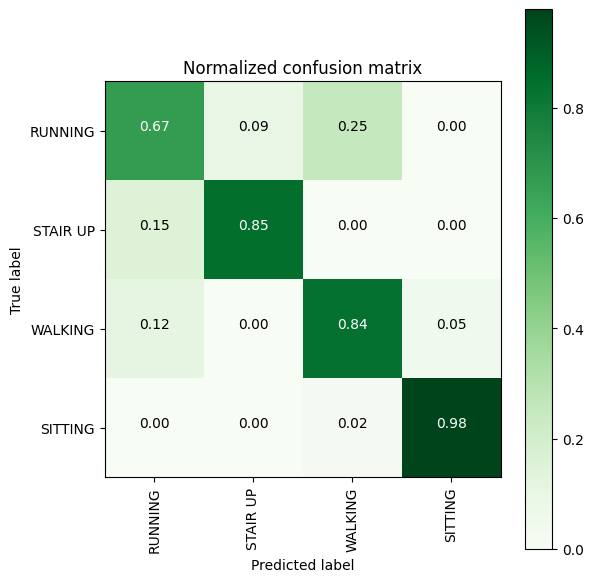

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.71      0.67      0.69       761
           2       0.91      0.85      0.88       779
           3       0.75      0.84      0.79       723
           4       0.96      0.98      0.97       737

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



In [12]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, alpha=0.0001)
mlp_results = perform_model(mlp_classifier, name='MLP', class_labels=labels)
# observe the attributes of the model 
filename = 'models/mlp.sav'
pickle.dump(mlp_results['model'], open(filename, 'wb'))

LOGISTIC REGRESSION

Predicting test data
==> F1 Score:- 0.7937488774733953

==> Accuracy:- 0.7936666666666666

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.7671295907749317, 2: 0.8978218186883402, 3: 0.8210965873783843, 4: 0.9635520625291172}

==> Root Mean Squared Error:- 0.719027120489902

==> Recall Score:- 0.7936666666666666

==> Precision Score:- 0.7938862509462644



/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


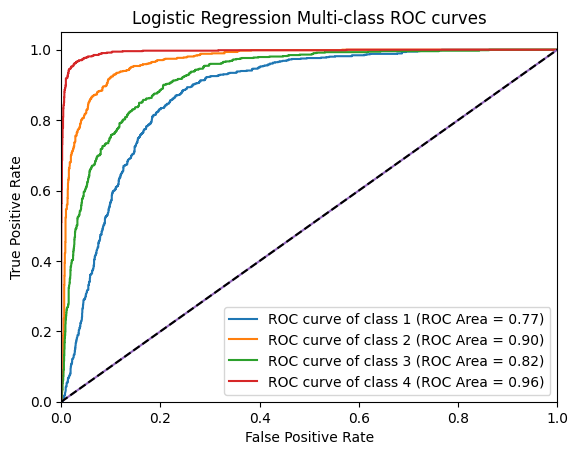

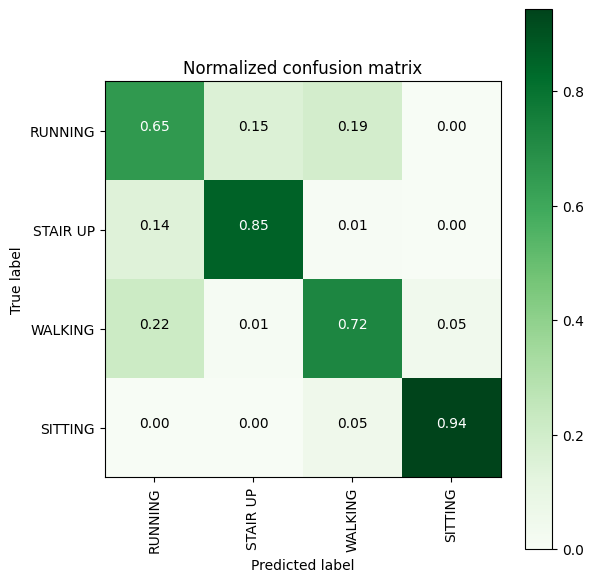

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           1       0.65      0.65      0.65       761
           2       0.84      0.85      0.85       779
           3       0.74      0.72      0.73       723
           4       0.95      0.94      0.95       737

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000



In [13]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0, solver='lbfgs',multi_class='multinomial',max_iter=100)
lr_results = perform_model(lr_classifier, name='Logistic Regression', class_labels=labels)
# observe the attributes of the model 
filename = 'models/lr.sav'
pickle.dump(lr_results['model'], open(filename, 'wb'))

In [14]:
# ***************************** Print Accuracy and Error ******************************

print('\n                     Accuracy     Error       F1 Score         RMS         Precision       Recall    |       AUC 1 (Stair Up)    AUC 2 (Running)    AUC 3 (Walking)   AUC 4 (Sitting)')
print('                     ----------   --------     --------       -----        ---------       ------    |         -----------         -----------        -----------        ----------- ')
print('KNN                  : {:.04}%       {:.04}%       {:.04}%       {:.04}%         {:.04}%          {:.04}%                {:.04}%            {:.04}%              {:.04}%              {:.04}%'.format(knn_results['accuracy'] * 100,\
                                                  100-(knn_results['accuracy'] * 100),
                                                  knn_results['f_measure'] * 100,\
                                                    knn_results['rms'] * 100,\
                                                    knn_results['prc_scr'] * 100,\
                                                        knn_results['rec'] * 100,\
                                                          knn_results['roc_auc_scores'][1] * 100,\
                                                            knn_results['roc_auc_scores'][2] * 100,\
                                                              knn_results['roc_auc_scores'][3] * 100,\
                                                                knn_results['roc_auc_scores'][4] * 100)
                                                                  )
                                                         
print('Naive Bayes          : {:.04}%       {:.04}%       {:.04}%       {:.04}%        {:.04}%          {:.04}%                {:.04}%            {:.04}%               {:.04}%              {:.04}%'.format(nb_results['accuracy'] * 100,\
                                                  100-(nb_results['accuracy'] * 100),
                                                  nb_results['f_measure'] * 100,\
                                                  nb_results['rms'] * 100,\
                                                    nb_results['prc_scr'] * 100,\
                                                        nb_results['rec'] * 100,\
                                                          nb_results['roc_auc_scores'][1] * 100,\
                                                            nb_results['roc_auc_scores'][2] * 100,\
                                                              nb_results['roc_auc_scores'][3] * 100,\
                                                                nb_results['roc_auc_scores'][4] * 100)
                                                                  )                                                            
                                                        
print('Random Forest        : {:.04}%       {:.04}%       {:.04}%       {:.04}%        {:.04}%          {:.04}%                {:.04}%            {:.04}%              {:.04}%              {:.04}%'.format(rf_results['accuracy'] * 100,\
                                                  100-(rf_results['accuracy'] * 100),
                                                  rf_results['f_measure'] * 100,\
                                                    rf_results['rms'] * 100,\
                                                    rf_results['prc_scr'] * 100,\
                                                        rf_results['rec'] * 100,\
                                                          rf_results['roc_auc_scores'][1] * 100,\
                                                            rf_results['roc_auc_scores'][2] * 100,\
                                                              rf_results['roc_auc_scores'][3] * 100,\
                                                                rf_results['roc_auc_scores'][4] * 100)
                                                                  )

                                                         
print('C4.5                 : {:.04}%       {:.04}%       {:.04}%       {:.04}%        {:.04}%          {:.04}%                {:.04}%            {:.04}%               {:.04}%              {:.04}%'.format(dt_results['accuracy'] * 100,\
                                                  100-(dt_results['accuracy'] * 100),
                                                  dt_results['f_measure'] * 100,\
                                                    dt_results['rms'] * 100,\
                                                    dt_results['prc_scr'] * 100,\
                                                        dt_results['rec'] * 100,\
                                                          dt_results['roc_auc_scores'][1] * 100,\
                                                            dt_results['roc_auc_scores'][2] * 100,\
                                                              dt_results['roc_auc_scores'][3] * 100,\
                                                                dt_results['roc_auc_scores'][4] * 100)
                                                                  )    
                                                         
print('SVM                  : {:.04}%       {:.04}%       {:.04}%       {:.04}%        {:.04}%          {:.04}%                {:.04}%            {:.04}%              {:.04}%              {:.04}%'.format(svm_results['accuracy'] * 100,\
                                                  100-(svm_results['accuracy'] * 100),
                                                  svm_results['f_measure'] * 100,\
                                                    svm_results['rms'] * 100,\
                                                    svm_results['prc_scr'] * 100,\
                                                        svm_results['rec'] * 100,\
                                                          svm_results['roc_auc_scores'][1] * 100,\
                                                            svm_results['roc_auc_scores'][2] * 100,\
                                                              svm_results['roc_auc_scores'][3] * 100,\
                                                                svm_results['roc_auc_scores'][4] * 100)
                                                                  ) 
                                                         
print('MLP                  : {:.04}%       {:.04}%       {:.04}%        {:.04}%        {:.04}%          {:.04}%                {:.04}%            {:.04}%              {:.04}%              {:.04}%'.format(mlp_results['accuracy'] * 100,\
                                                  100-(mlp_results['accuracy'] * 100),
                                                  mlp_results['f_measure'] * 100,\
                                                    mlp_results['rms'] * 100,\
                                                    mlp_results['prc_scr'] * 100,\
                                                        mlp_results['rec'] * 100,\
                                                          mlp_results['roc_auc_scores'][1] * 100,\
                                                            mlp_results['roc_auc_scores'][2] * 100,\
                                                              mlp_results['roc_auc_scores'][3] * 100,\
                                                                mlp_results['roc_auc_scores'][4] * 100)
                                                                  ) 
                                                        
print('Logistic Regression  : {:.04}%       {:.04}%       {:.04}%       {:.04}%         {:.04}%          {:.04}%                {:.04}%            {:.04}%              {:.04}%              {:.04}%'.format(lr_results['accuracy'] * 100,\
                                                  100-(lr_results['accuracy'] * 100),
                                                  lr_results['f_measure'] * 100,\
                                                    lr_results['rms'] * 100,\
                                                    lr_results['prc_scr'] * 100,\
                                                        lr_results['rec'] * 100,\
                                                          lr_results['roc_auc_scores'][1] * 100,\
                                                            lr_results['roc_auc_scores'][2] * 100,\
                                                              lr_results['roc_auc_scores'][3] * 100,\
                                                                lr_results['roc_auc_scores'][4] * 100)
                                                                  )                                                                   


                     Accuracy     Error       F1 Score         RMS         Precision       Recall    |       AUC 1 (Stair Up)    AUC 2 (Running)    AUC 3 (Walking)   AUC 4 (Sitting)
                     ----------   --------     --------       -----        ---------       ------    |         -----------         -----------        -----------        ----------- 
KNN                  : 86.7%       13.3%       86.73%       56.89%         86.75%          86.7%                84.17%            92.25%              89.84%              98.36%
Naive Bayes          : 75.47%       24.53%       75.37%       79.92%        75.34%          75.47%                70.92%            87.65%               79.76%              96.36%
Random Forest        : 84.83%       15.17%       84.81%       60.8%        84.8%          84.83%                80.99%            90.99%              89.2%              98.54%
C4.5                 : 88.8%       11.2%       88.84%       51.87%        88.9%          88.8%        

PREDICT ACTIVITY USING HEALTH DATA

In [15]:
def bmi_index_cal(bmi_valu):
    bmi_index = 0
    if(bmi_valu<16):
        bmi_index = 0
        
    elif(16<bmi_valu<=18.5):
        bmi_index = 1
    elif(18.5<bmi_valu<=25):
        bmi_index = 2
    elif(25<bmi_valu<=30):
        bmi_index = 3
    elif(30<bmi_valu<=35):
        bmi_index = 4
    else:
        bmi_index = 5

    return bmi_index

In [16]:
def bmi_value_cal(bmi_valu):
    if(bmi_valu<16):
        print("Body Type / Level: Too Weak / 0")
    elif(16<bmi_valu<=18.5):
        print("Body Type / Level: Weak / 1")
    elif(18.5<bmi_valu<=25):
        print("Body Type / Level: Normal / 2")
    elif(25<bmi_valu<=30):
        print("Body Type / Level: Fat / 3")
    elif(30<bmi_valu<=35):
        print("Body Type / Level: Onset of Obesity / 4")
    else:
        print("Body Type / Level: Obese / 5")

In [17]:
def news_input():
    height_input = int(input("Height: "))
    weight_input = int(input("Weight: "))
    age_input = int(input("Age: "))
    gender_input = input("Sex: ")
    if gender_input.startswith(('m','M','e','E')):
        gender_input=1
    elif gender_input.startswith(('f','F','k','K')):
        gender_input=0
    heart_rate_risk_input = input("Do You Have Heart Disease?: ")
    if heart_rate_risk_input.startswith(('y','Y','e','E')):
        heart_rate_risk_input=1
    elif heart_rate_risk_input.startswith(('h','H','n','N')):
        heart_rate_risk_input=0
    heart_rate_input = int(input("Heart Rate: "))
    bmi = int(weight_input/((height_input/100)**2))
    bmiIndex = bmi_index_cal(bmi)
    input_arr = np.array([[height_input,weight_input,age_input,gender_input,bmi,bmiIndex,heart_rate_risk_input,heart_rate_input]])
    return input_arr

In [18]:
def new_outputs(pred_model,newInput):
    print("Height:",newInput[0][0])
    print("Weight:",newInput[0][1])
    print("Age:",newInput[0][2])
    if newInput[0][3] == 1:
        print("Sex: Male")
    else:
        print("Sex: Female")
    bmi_value_cal(newInput[0][4])
    print("Body Mass Index:",newInput[0][4])
    if newInput[0][6] == 1:
        print("Heart Disease: Yes")
    else:
        print("Heart Disease: No")
    print("Heart Rate:",newInput[0][7])
    

In [19]:
loaded_model = pickle.load(open('models/svm.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8003333333333333


In [20]:
new_input = news_input()
# get prediction for new input

new_output = loaded_model.predict(new_input)
# summarize input and output
if new_output == 1:
    new_outputs(new_output,new_input)
    print("You are Climbing Stairs now!")
elif new_output == 2:
    new_outputs(new_output,new_input)
    print("You Are Running Now!")
elif new_output == 3:
    new_outputs(new_output,new_input)
    print("You are Walking now!")
elif new_output == 4:
    new_outputs(new_output,new_input)
    print("You are Sitting now!")